In [1]:
#Importing Packages
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [2]:
seed=7

In [3]:
# Importing the dataset
dt = pd.read_excel('LUAD_Genes.xlsx',index_col=0)


In [4]:
dt.shape

(517, 14807)

In [5]:
dt.head(2)

,UBE2Q2P2,SSX9,CXORF67,EFCAB8,SDR16C6P,EFCAB12,A1BG,A1CF,RBFOX1,GGACT,...,SLTM,SLU7,SLURP1,SMAD2,SMAD3,SMAD4,SMAD5,SMAD6,SMAD7,Survival
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,-0.4238,-0.1379,-0.1805,0.4529,-0.3317,-0.1012,-0.6977,-0.1476,-0.224,0.3832,...,-1.1877,3.4584,-0.2752,-0.7736,-0.6896,-0.0017,0.1779,-0.6433,0.7445,0.00
TCGA-05-4249-01,-0.3291,-0.1379,-0.1805,-0.0869,-0.3317,-0.1661,-0.1483,-0.1371,-0.226,-0.5346,...,-0.5540,0.7962,-0.2752,-0.6214,0.0881,1.3829,2.3203,-0.4918,0.0368,50.03


In [6]:
X = dt.iloc[:,0:14806].values
y = dt.iloc[:, -1].values

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)

In [9]:
sc_y = StandardScaler()
y_train = np.squeeze(sc_y.fit_transform(y_train.reshape(-1, 1)))
y_val = np.squeeze(sc_y.transform(y_val.reshape(-1, 1)))
y_test = np.squeeze(sc_y.transform(y_test.reshape(-1, 1)))

In [10]:
def baseline_model():
 #create model
    model = Sequential()
    
    # The Input Layer:
    model.add(Dense(128, kernel_initializer='normal', input_dim = X_train.shape[1], activation='relu'))
    
    # The Hidden Layers:
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    
    # The Output Layer:
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    
    # Compile Model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
    return model

In [11]:
model = KerasRegressor(build_fn=baseline_model, batch_size=15, epochs=10, verbose=True)

In [12]:
kfold =KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std())) 

Epoch 1/10
297/297 [==============================] - 0s 1ms/sample - loss: 1.3412 - mean_absolute_error: 0.7981
Epoch 2/10
297/297 [==============================] - 0s 707us/sample - loss: 0.9774 - mean_absolute_error: 0.6518
Epoch 3/10
297/297 [==============================] - 0s 685us/sample - loss: 0.3873 - mean_absolute_error: 0.4491
Epoch 4/10
297/297 [==============================] - 0s 693us/sample - loss: 0.6394 - mean_absolute_error: 0.4541
Epoch 5/10
297/297 [==============================] - 0s 692us/sample - loss: 0.5538 - mean_absolute_error: 0.4240
Epoch 6/10
297/297 [==============================] - 0s 708us/sample - loss: 0.2684 - mean_absolute_error: 0.3365
Epoch 7/10
297/297 [==============================] - 0s 739us/sample - loss: 0.2773 - mean_absolute_error: 0.2766
Epoch 8/10
297/297 [==============================] - 0s 721us/sample - loss: 0.2597 - mean_absolute_error: 0.2197
Epoch 9/10
297/297 [==============================] - 0s 696us/sample - loss: 0.13

297/297 [==============================] - 0s 649us/sample - loss: 0.3836 - mean_absolute_error: 0.3497
Epoch 6/10
297/297 [==============================] - 0s 634us/sample - loss: 0.2127 - mean_absolute_error: 0.3346
Epoch 7/10
297/297 [==============================] - 0s 629us/sample - loss: 0.3034 - mean_absolute_error: 0.3370
Epoch 8/10
297/297 [==============================] - 0s 630us/sample - loss: 0.1245 - mean_absolute_error: 0.2600
Epoch 9/10
297/297 [==============================] - 0s 632us/sample - loss: 0.0749 - mean_absolute_error: 0.1662
Epoch 10/10
33/33 [==============================] - 0s 1ms/sample - loss: 1.7293 - mean_absolute_error: 0.7937
Epoch 1/10
297/297 [==============================] - 0s 1ms/sample - loss: 1.3447 - mean_absolute_error: 0.8068
Epoch 2/10
297/297 [==============================] - 0s 629us/sample - loss: 0.7978 - mean_absolute_error: 0.6314
Epoch 3/10
297/297 [==============================] - 0s 627us/sample - loss: 0.4087 - mean_abso

In [13]:
model.fit(X_train, y_train)

Epoch 1/10
330/330 [==============================] - 0s 1ms/sample - loss: 1.3353 - mean_absolute_error: 0.8069
Epoch 2/10
330/330 [==============================] - 0s 671us/sample - loss: 0.9402 - mean_absolute_error: 0.6640
Epoch 3/10
330/330 [==============================] - 0s 671us/sample - loss: 0.4831 - mean_absolute_error: 0.4892
Epoch 4/10
330/330 [==============================] - 0s 670us/sample - loss: 0.5896 - mean_absolute_error: 0.4305
Epoch 5/10
330/330 [==============================] - 0s 667us/sample - loss: 0.2064 - mean_absolute_error: 0.3274
Epoch 6/10
330/330 [==============================] - 0s 663us/sample - loss: 0.3156 - mean_absolute_error: 0.3088
Epoch 7/10
330/330 [==============================] - 0s 664us/sample - loss: 0.3020 - mean_absolute_error: 0.2718
Epoch 8/10
330/330 [==============================] - 0s 664us/sample - loss: 0.2765 - mean_absolute_error: 0.2704
Epoch 9/10
330/330 [==============================] - 0s 666us/sample - loss: 0.22

In [14]:
y_predval = model.predict(X_val)

83/83 [==============================] - 0s 291us/sample


In [15]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

from sklearn.metrics import r2_score
accuracy=r2_score(y_val,y_predval)

print('R2 Score')
print(accuracy)

12038621844295.555
2.5182978665159424e+27
50182645072932.76
R2 Score
-3.6147932603844387e+27


R^2 = -3614793260384438693748801536.0000


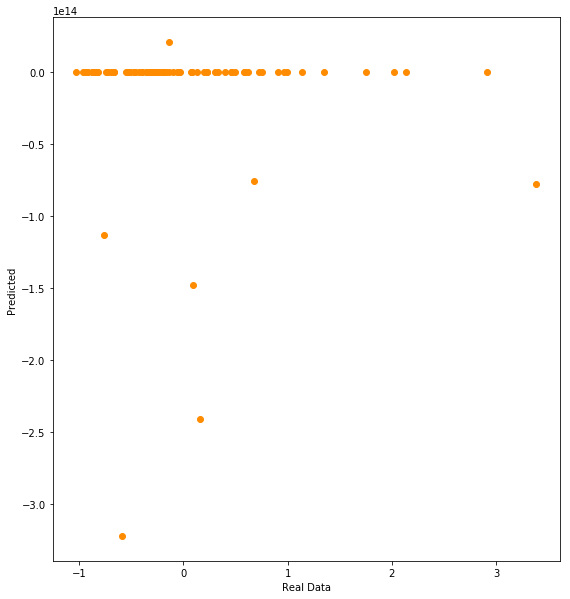

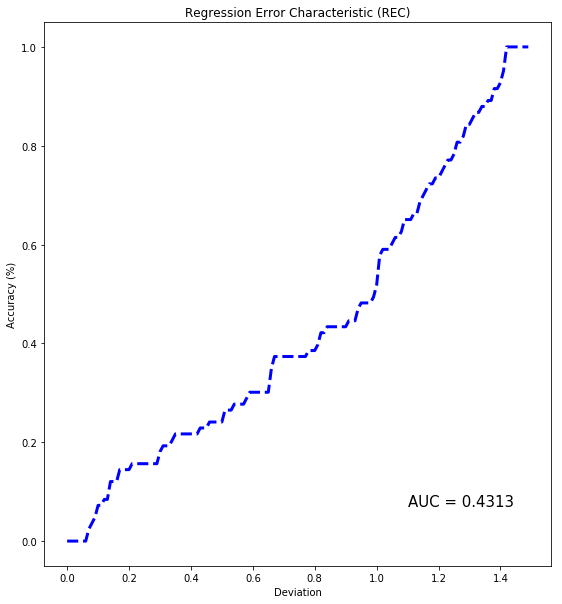

In [17]:
# Visualising the Decision Tree Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(20 , 10))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.figure(figsize=(20 , 10))
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
print("R^2 = %0.4f" %RR)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()

In [18]:
# define the grid search paramerters
batch_size = [5, 10, 15, 20]
epochs = [10, 20,30,40]

In [19]:
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)

/Users/Zayeem/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
220/220 [==============================] - 1s 2ms/sample - loss: 1.4428 - mean_absolute_error: 0.8290
Epoch 2/10
220/220 [==============================] - 0s 2ms/sample - loss: 1.0693 - mean_absolute_error: 0.6273
Epoch 3/10
220/220 [==============================] - 0s 2ms/sample - loss: 0.8875 - mean_absolute_error: 0.6118
Epoch 4/10
220/220 [==============================] - 0s 2ms/sample - loss: 0.6119 - mean_absolute_error: 0.5109
Epoch 5/10
220/220 [==============================] - 0s 2ms/sample - loss: 0.4938 - mean_absolute_error: 0.4450
Epoch 6/10
220/220 [==============================] - 0s 2ms/sample - loss: 0.5282 - mean_absolute_error: 0.4471
Epoch 7/10
220/220 [==============================] - 0s 2ms/sample - loss: 0.8876 - mean_absolute_error: 0.4334
Epoch 8/10
220/220 [==============================] - 0s 2ms/sample - loss: 0.9694 - mean_absolute_error: 0.5819
Epoch 9/10
220/220 [==============================] - 0s 2ms/sample - loss: 0.3671 - mean_absolu

Epoch 16/20
220/220 [==============================] - 0s 2ms/sample - loss: 0.1069 - mean_absolute_error: 0.1375
Epoch 17/20
220/220 [==============================] - 0s 2ms/sample - loss: 0.0520 - mean_absolute_error: 0.0993
Epoch 18/20
220/220 [==============================] - 0s 2ms/sample - loss: 0.0601 - mean_absolute_error: 0.1186
Epoch 19/20
220/220 [==============================] - 0s 2ms/sample - loss: 0.0332 - mean_absolute_error: 0.1087
Epoch 20/20
220/220 [==============================] - 0s 321us/sample - loss: 0.0318 - mean_absolute_error: 0.0825
Epoch 1/20
220/220 [==============================] - 1s 2ms/sample - loss: 1.6636 - mean_absolute_error: 0.9428
Epoch 2/20
220/220 [==============================] - 0s 2ms/sample - loss: 1.1183 - mean_absolute_error: 0.7331
Epoch 3/20
220/220 [==============================] - 0s 2ms/sample - loss: 0.5461 - mean_absolute_error: 0.5481
Epoch 4/20
220/220 [==============================] - 0s 2ms/sample - loss: 0.7101 - mean

220/220 [==============================] - 0s 2ms/sample - loss: 0.1367 - mean_absolute_error: 0.1627
Epoch 13/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.0880 - mean_absolute_error: 0.1587
Epoch 14/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.0390 - mean_absolute_error: 0.1243
Epoch 15/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.0294 - mean_absolute_error: 0.1156
Epoch 16/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.0493 - mean_absolute_error: 0.1262
Epoch 17/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.0909 - mean_absolute_error: 0.1182
Epoch 18/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.0489 - mean_absolute_error: 0.1165
Epoch 19/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.0296 - mean_absolute_error: 0.1041
Epoch 20/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.0169 - mean_absolute_

220/220 [==============================] - 0s 2ms/sample - loss: 0.1958 - mean_absolute_error: 0.1454
Epoch 21/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.1277 - mean_absolute_error: 0.1662
Epoch 22/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.2566 - mean_absolute_error: 0.1963
Epoch 23/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.4797 - mean_absolute_error: 0.2133
Epoch 24/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.3448 - mean_absolute_error: 0.1896
Epoch 25/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.2119 - mean_absolute_error: 0.1689
Epoch 26/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.0686 - mean_absolute_error: 0.1301
Epoch 27/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.1202 - mean_absolute_error: 0.0961
Epoch 28/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.0167 - mean_absolute_

220/220 [==============================] - 0s 2ms/sample - loss: 0.5482 - mean_absolute_error: 0.4405
Epoch 9/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.5051 - mean_absolute_error: 0.3650
Epoch 10/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.3697 - mean_absolute_error: 0.3562
Epoch 11/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.4522 - mean_absolute_error: 0.3025
Epoch 12/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.3985 - mean_absolute_error: 0.3280
Epoch 13/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.2472 - mean_absolute_error: 0.2865
Epoch 14/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.3479 - mean_absolute_error: 0.3315
Epoch 15/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.2290 - mean_absolute_error: 0.2500
Epoch 16/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.5742 - mean_absolute_e

220/220 [==============================] - 0s 915us/sample - loss: 1.1903 - mean_absolute_error: 0.6967
Epoch 3/20
220/220 [==============================] - 0s 914us/sample - loss: 0.6715 - mean_absolute_error: 0.4910
Epoch 4/20
220/220 [==============================] - 0s 910us/sample - loss: 0.2751 - mean_absolute_error: 0.3395
Epoch 5/20
220/220 [==============================] - 0s 902us/sample - loss: 0.4821 - mean_absolute_error: 0.3947
Epoch 6/20
220/220 [==============================] - 0s 909us/sample - loss: 0.6615 - mean_absolute_error: 0.4245
Epoch 7/20
220/220 [==============================] - 0s 922us/sample - loss: 0.5025 - mean_absolute_error: 0.3937
Epoch 8/20
220/220 [==============================] - 0s 922us/sample - loss: 0.2164 - mean_absolute_error: 0.2534
Epoch 9/20
220/220 [==============================] - 0s 915us/sample - loss: 0.1257 - mean_absolute_error: 0.2287
Epoch 10/20
220/220 [==============================] - 0s 920us/sample - loss: 0.1040 - mea

220/220 [==============================] - 0s 921us/sample - loss: 0.2815 - mean_absolute_error: 0.2767
Epoch 8/30
220/220 [==============================] - 0s 911us/sample - loss: 0.3062 - mean_absolute_error: 0.2316
Epoch 9/30
220/220 [==============================] - 0s 914us/sample - loss: 0.3664 - mean_absolute_error: 0.2432
Epoch 10/30
220/220 [==============================] - 0s 917us/sample - loss: 0.2054 - mean_absolute_error: 0.2156
Epoch 11/30
220/220 [==============================] - 0s 918us/sample - loss: 0.0395 - mean_absolute_error: 0.1362
Epoch 12/30
220/220 [==============================] - 0s 922us/sample - loss: 0.0775 - mean_absolute_error: 0.1408
Epoch 13/30
220/220 [==============================] - 0s 911us/sample - loss: 0.1305 - mean_absolute_error: 0.1766
Epoch 14/30
220/220 [==============================] - 0s 911us/sample - loss: 0.1541 - mean_absolute_error: 0.1856
Epoch 15/30
220/220 [==============================] - 0s 916us/sample - loss: 0.0967 

220/220 [==============================] - 0s 924us/sample - loss: 0.1496 - mean_absolute_error: 0.2034
Epoch 15/30
220/220 [==============================] - 0s 910us/sample - loss: 0.1567 - mean_absolute_error: 0.2257
Epoch 16/30
220/220 [==============================] - 0s 907us/sample - loss: 0.1943 - mean_absolute_error: 0.2050
Epoch 17/30
220/220 [==============================] - 0s 906us/sample - loss: 0.2601 - mean_absolute_error: 0.2202
Epoch 18/30
220/220 [==============================] - 0s 915us/sample - loss: 0.2448 - mean_absolute_error: 0.1788
Epoch 19/30
220/220 [==============================] - 0s 923us/sample - loss: 0.0968 - mean_absolute_error: 0.1486
Epoch 20/30
220/220 [==============================] - 0s 922us/sample - loss: 0.4087 - mean_absolute_error: 0.2154
Epoch 21/30
220/220 [==============================] - 0s 916us/sample - loss: 0.2686 - mean_absolute_error: 0.1885
Epoch 22/30
220/220 [==============================] - 0s 973us/sample - loss: 0.244

Epoch 12/40
220/220 [==============================] - 0s 990us/sample - loss: 0.0492 - mean_absolute_error: 0.1349
Epoch 13/40
220/220 [==============================] - 0s 995us/sample - loss: 0.0309 - mean_absolute_error: 0.1037
Epoch 14/40
220/220 [==============================] - 0s 1ms/sample - loss: 0.0205 - mean_absolute_error: 0.0907
Epoch 15/40
220/220 [==============================] - 0s 993us/sample - loss: 0.0179 - mean_absolute_error: 0.0803
Epoch 16/40
220/220 [==============================] - 0s 982us/sample - loss: 0.0202 - mean_absolute_error: 0.0820
Epoch 17/40
220/220 [==============================] - 0s 985us/sample - loss: 0.0267 - mean_absolute_error: 0.0828
Epoch 18/40
220/220 [==============================] - 0s 996us/sample - loss: 0.0697 - mean_absolute_error: 0.0952
Epoch 19/40
220/220 [==============================] - 0s 1ms/sample - loss: 0.0326 - mean_absolute_error: 0.1007
Epoch 20/40
220/220 [==============================] - 0s 995us/sample - los

220/220 [==============================] - 0s 226us/sample - loss: 0.0113 - mean_absolute_error: 0.0655
Epoch 1/10
220/220 [==============================] - 0s 1ms/sample - loss: 1.7440 - mean_absolute_error: 0.9303
Epoch 2/10
220/220 [==============================] - 0s 642us/sample - loss: 0.8037 - mean_absolute_error: 0.5803
Epoch 3/10
220/220 [==============================] - 0s 638us/sample - loss: 0.6281 - mean_absolute_error: 0.4717
Epoch 4/10
220/220 [==============================] - 0s 631us/sample - loss: 0.3611 - mean_absolute_error: 0.3585
Epoch 5/10
220/220 [==============================] - 0s 639us/sample - loss: 0.4451 - mean_absolute_error: 0.3743
Epoch 6/10
220/220 [==============================] - 0s 636us/sample - loss: 0.5452 - mean_absolute_error: 0.4066
Epoch 7/10
220/220 [==============================] - 0s 638us/sample - loss: 0.2124 - mean_absolute_error: 0.3130
Epoch 8/10
220/220 [==============================] - 0s 641us/sample - loss: 0.6045 - mean_a

220/220 [==============================] - 0s 655us/sample - loss: 0.0631 - mean_absolute_error: 0.1648
Epoch 14/20
220/220 [==============================] - 0s 649us/sample - loss: 0.0398 - mean_absolute_error: 0.1159
Epoch 15/20
220/220 [==============================] - 0s 646us/sample - loss: 0.0283 - mean_absolute_error: 0.1085
Epoch 16/20
220/220 [==============================] - 0s 670us/sample - loss: 0.0105 - mean_absolute_error: 0.0707
Epoch 17/20
220/220 [==============================] - 0s 657us/sample - loss: 0.0220 - mean_absolute_error: 0.0714
Epoch 18/20
220/220 [==============================] - 0s 652us/sample - loss: 0.0108 - mean_absolute_error: 0.0600
Epoch 19/20
220/220 [==============================] - 0s 648us/sample - loss: 0.0221 - mean_absolute_error: 0.0756
Epoch 20/20
220/220 [==============================] - 0s 174us/sample - loss: 0.0310 - mean_absolute_error: 0.1310
Epoch 1/20
220/220 [==============================] - 0s 1ms/sample - loss: 1.6478 -

220/220 [==============================] - 0s 718us/sample - loss: 0.0529 - mean_absolute_error: 0.1503
Epoch 9/30
220/220 [==============================] - 0s 704us/sample - loss: 0.0591 - mean_absolute_error: 0.1620
Epoch 10/30
220/220 [==============================] - 0s 728us/sample - loss: 0.0369 - mean_absolute_error: 0.1378
Epoch 11/30
220/220 [==============================] - 0s 706us/sample - loss: 0.0453 - mean_absolute_error: 0.1342
Epoch 12/30
220/220 [==============================] - 0s 722us/sample - loss: 0.0213 - mean_absolute_error: 0.1007
Epoch 13/30
220/220 [==============================] - 0s 704us/sample - loss: 0.0303 - mean_absolute_error: 0.1044
Epoch 14/30
220/220 [==============================] - 0s 724us/sample - loss: 0.0422 - mean_absolute_error: 0.1158
Epoch 15/30
220/220 [==============================] - 0s 703us/sample - loss: 0.0748 - mean_absolute_error: 0.1506
Epoch 16/30
220/220 [==============================] - 0s 724us/sample - loss: 0.0283

220/220 [==============================] - 0s 660us/sample - loss: 0.1910 - mean_absolute_error: 0.1809
Epoch 16/40
220/220 [==============================] - 0s 649us/sample - loss: 0.1665 - mean_absolute_error: 0.1745
Epoch 17/40
220/220 [==============================] - 0s 661us/sample - loss: 0.1912 - mean_absolute_error: 0.1914
Epoch 18/40
220/220 [==============================] - 0s 653us/sample - loss: 0.1621 - mean_absolute_error: 0.1608
Epoch 19/40
220/220 [==============================] - 0s 651us/sample - loss: 0.0466 - mean_absolute_error: 0.1262
Epoch 20/40
220/220 [==============================] - 0s 653us/sample - loss: 0.0367 - mean_absolute_error: 0.0963
Epoch 21/40
220/220 [==============================] - 0s 655us/sample - loss: 0.0385 - mean_absolute_error: 0.0811
Epoch 22/40
220/220 [==============================] - 0s 653us/sample - loss: 0.0170 - mean_absolute_error: 0.0642
Epoch 23/40
220/220 [==============================] - 0s 654us/sample - loss: 0.012

220/220 [==============================] - 0s 685us/sample - loss: 1.1255 - mean_absolute_error: 0.7647
Epoch 3/40
220/220 [==============================] - 0s 743us/sample - loss: 0.6246 - mean_absolute_error: 0.5629
Epoch 4/40
220/220 [==============================] - 0s 747us/sample - loss: 0.5270 - mean_absolute_error: 0.3951
Epoch 5/40
220/220 [==============================] - 0s 723us/sample - loss: 0.4942 - mean_absolute_error: 0.4073
Epoch 6/40
220/220 [==============================] - 0s 743us/sample - loss: 0.2706 - mean_absolute_error: 0.3424
Epoch 7/40
220/220 [==============================] - 0s 665us/sample - loss: 0.2439 - mean_absolute_error: 0.2946
Epoch 8/40
220/220 [==============================] - 0s 671us/sample - loss: 0.2889 - mean_absolute_error: 0.2471
Epoch 9/40
220/220 [==============================] - 0s 745us/sample - loss: 0.2006 - mean_absolute_error: 0.2188
Epoch 10/40
220/220 [==============================] - 0s 692us/sample - loss: 0.0973 - mea

220/220 [==============================] - 0s 576us/sample - loss: 0.1462 - mean_absolute_error: 0.2357
Epoch 8/10
220/220 [==============================] - 0s 569us/sample - loss: 0.1129 - mean_absolute_error: 0.2121
Epoch 9/10
220/220 [==============================] - 0s 547us/sample - loss: 0.0749 - mean_absolute_error: 0.1674
Epoch 10/10
220/220 [==============================] - 0s 144us/sample - loss: 0.0335 - mean_absolute_error: 0.1139
Epoch 1/20
220/220 [==============================] - 0s 1ms/sample - loss: 1.4305 - mean_absolute_error: 0.8093
Epoch 2/20
220/220 [==============================] - 0s 507us/sample - loss: 0.7965 - mean_absolute_error: 0.5829
Epoch 3/20
220/220 [==============================] - 0s 525us/sample - loss: 0.4712 - mean_absolute_error: 0.4753
Epoch 4/20
220/220 [==============================] - 0s 518us/sample - loss: 0.4769 - mean_absolute_error: 0.4897
Epoch 5/20
220/220 [==============================] - 0s 535us/sample - loss: 0.3335 - mean_

220/220 [==============================] - 0s 153us/sample - loss: 0.0367 - mean_absolute_error: 0.1147
Epoch 1/30
220/220 [==============================] - 0s 1ms/sample - loss: 1.3267 - mean_absolute_error: 0.7554
Epoch 2/30
220/220 [==============================] - 0s 537us/sample - loss: 0.8293 - mean_absolute_error: 0.6173
Epoch 3/30
220/220 [==============================] - 0s 509us/sample - loss: 0.6205 - mean_absolute_error: 0.4996
Epoch 4/30
220/220 [==============================] - 0s 526us/sample - loss: 0.3694 - mean_absolute_error: 0.3859
Epoch 5/30
220/220 [==============================] - 0s 527us/sample - loss: 0.2690 - mean_absolute_error: 0.3153
Epoch 6/30
220/220 [==============================] - 0s 516us/sample - loss: 0.3998 - mean_absolute_error: 0.3839
Epoch 7/30
220/220 [==============================] - 0s 515us/sample - loss: 0.4459 - mean_absolute_error: 0.4321
Epoch 8/30
220/220 [==============================] - 0s 518us/sample - loss: 0.1263 - mean_a

220/220 [==============================] - 0s 530us/sample - loss: 0.1214 - mean_absolute_error: 0.2387
Epoch 8/30
220/220 [==============================] - 0s 517us/sample - loss: 0.1229 - mean_absolute_error: 0.2322
Epoch 9/30
220/220 [==============================] - 0s 511us/sample - loss: 0.0898 - mean_absolute_error: 0.1815
Epoch 10/30
220/220 [==============================] - 0s 524us/sample - loss: 0.0827 - mean_absolute_error: 0.1564
Epoch 11/30
220/220 [==============================] - 0s 567us/sample - loss: 0.0585 - mean_absolute_error: 0.1219
Epoch 12/30
220/220 [==============================] - 0s 530us/sample - loss: 0.0588 - mean_absolute_error: 0.1000
Epoch 13/30
220/220 [==============================] - 0s 519us/sample - loss: 0.0508 - mean_absolute_error: 0.1158
Epoch 14/30
220/220 [==============================] - 0s 528us/sample - loss: 0.0279 - mean_absolute_error: 0.1067
Epoch 15/30
220/220 [==============================] - 0s 542us/sample - loss: 0.0337 

220/220 [==============================] - 0s 526us/sample - loss: 0.2609 - mean_absolute_error: 0.3828
Epoch 5/40
220/220 [==============================] - 0s 505us/sample - loss: 0.2245 - mean_absolute_error: 0.3099
Epoch 6/40
220/220 [==============================] - 0s 508us/sample - loss: 0.1395 - mean_absolute_error: 0.2629
Epoch 7/40
220/220 [==============================] - 0s 526us/sample - loss: 0.1083 - mean_absolute_error: 0.2432
Epoch 8/40
220/220 [==============================] - 0s 514us/sample - loss: 0.1397 - mean_absolute_error: 0.1939
Epoch 9/40
220/220 [==============================] - 0s 525us/sample - loss: 0.1076 - mean_absolute_error: 0.1740
Epoch 10/40
220/220 [==============================] - 0s 523us/sample - loss: 0.0732 - mean_absolute_error: 0.1473
Epoch 11/40
220/220 [==============================] - 0s 538us/sample - loss: 0.0472 - mean_absolute_error: 0.1352
Epoch 12/40
220/220 [==============================] - 0s 541us/sample - loss: 0.0297 - m

220/220 [==============================] - 0s 497us/sample - loss: 0.0479 - mean_absolute_error: 0.0714
Epoch 34/40
220/220 [==============================] - 0s 507us/sample - loss: 0.1327 - mean_absolute_error: 0.1214
Epoch 35/40
220/220 [==============================] - 0s 505us/sample - loss: 0.0658 - mean_absolute_error: 0.1223
Epoch 36/40
220/220 [==============================] - 0s 515us/sample - loss: 0.1152 - mean_absolute_error: 0.1430
Epoch 37/40
220/220 [==============================] - 0s 517us/sample - loss: 0.1040 - mean_absolute_error: 0.1312
Epoch 38/40
220/220 [==============================] - 0s 522us/sample - loss: 0.0521 - mean_absolute_error: 0.1292
Epoch 39/40
220/220 [==============================] - 0s 516us/sample - loss: 0.0943 - mean_absolute_error: 0.1660
Epoch 40/40
220/220 [==============================] - 0s 145us/sample - loss: 0.1158 - mean_absolute_error: 0.1959
Epoch 1/10
330/330 [==============================] - 0s 1ms/sample - loss: 1.2863 -

In [20]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -1.100658 using {'batch_size': 10, 'epochs': 10}
-1.154210 (0.464369) with: {'batch_size': 5, 'epochs': 10}
-1.195011 (0.343687) with: {'batch_size': 5, 'epochs': 20}
-1.161072 (0.329749) with: {'batch_size': 5, 'epochs': 30}
-1.225202 (0.379179) with: {'batch_size': 5, 'epochs': 40}
-1.100658 (0.467041) with: {'batch_size': 10, 'epochs': 10}
-1.189470 (0.316906) with: {'batch_size': 10, 'epochs': 20}
-1.198527 (0.365057) with: {'batch_size': 10, 'epochs': 30}
-1.204433 (0.345228) with: {'batch_size': 10, 'epochs': 40}
-1.191366 (0.388473) with: {'batch_size': 15, 'epochs': 10}
-1.134812 (0.364180) with: {'batch_size': 15, 'epochs': 20}
-1.126373 (0.358946) with: {'batch_size': 15, 'epochs': 30}
-1.132354 (0.368526) with: {'batch_size': 15, 'epochs': 40}
-1.194851 (0.441801) with: {'batch_size': 20, 'epochs': 10}
-1.129594 (0.361797) with: {'batch_size': 20, 'epochs': 20}
-1.117154 (0.381811) with: {'batch_size': 20, 'epochs': 30}
-1.116785 (0.407697) with: {'batch_size': 20, 'ep

In [21]:
newmodel = KerasRegressor(build_fn=baseline_model, batch_size=10, epochs=10, verbose=True)

In [22]:
newmodel.fit(X_train, y_train)

Epoch 1/10
330/330 [==============================] - 0s 1ms/sample - loss: 1.3723 - mean_absolute_error: 0.8263
Epoch 2/10
330/330 [==============================] - 0s 945us/sample - loss: 0.9292 - mean_absolute_error: 0.6455
Epoch 3/10
330/330 [==============================] - 0s 932us/sample - loss: 0.7667 - mean_absolute_error: 0.5664
Epoch 4/10
330/330 [==============================] - 0s 953us/sample - loss: 0.8044 - mean_absolute_error: 0.5028
Epoch 5/10
330/330 [==============================] - 0s 934us/sample - loss: 0.6402 - mean_absolute_error: 0.4931
Epoch 6/10
330/330 [==============================] - 0s 940us/sample - loss: 0.4434 - mean_absolute_error: 0.4231
Epoch 7/10
330/330 [==============================] - 0s 933us/sample - loss: 0.3086 - mean_absolute_error: 0.3464
Epoch 8/10
330/330 [==============================] - 0s 929us/sample - loss: 0.3738 - mean_absolute_error: 0.3019
Epoch 9/10
330/330 [==============================] - 0s 931us/sample - loss: 0.16

In [23]:
y_predval = newmodel.predict(X_val)

83/83 [==============================] - 0s 364us/sample


In [24]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

from sklearn.metrics import r2_score
accuracy=r2_score(y_val,y_predval)

print('R2 Score')
print(accuracy)

22624488081137.125
1.4335463079379173e+28
119730794198398.16
R2 Score
-2.057728595685237e+28


R^2 = -20577285956852371616287424512.0000


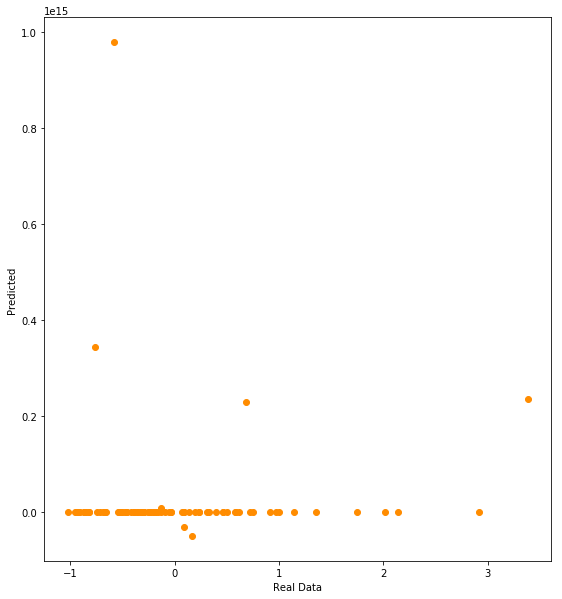

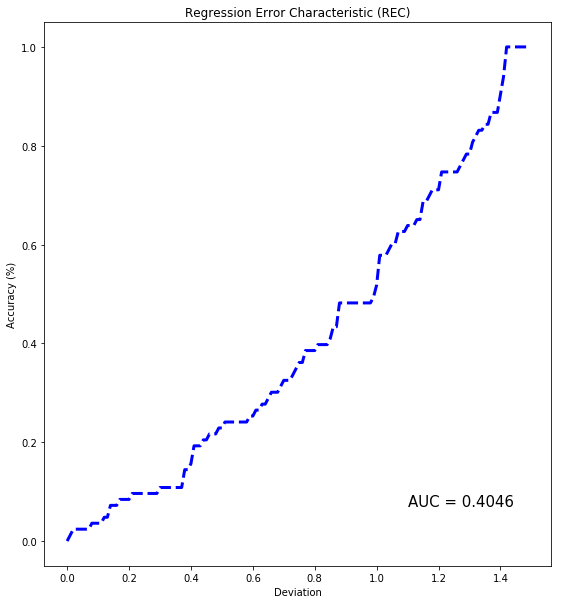

In [25]:
# Visualising the Decision Tree Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(20 , 10))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.figure(figsize=(20 , 10))
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
print("R^2 = %0.4f" %RR)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()